In [1]:
from numpy import *
from mpl_toolkits.mplot3d import Axes3D

from pylab import *
from matplotlib import rc 
from matplotlib.pyplot import cm,figure,axes,plot,xlabel,ylabel,title,savefig,show

import os
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import pylab as pylab
import scipy.io.netcdf as nc
matplotlib.interactive(True) # no plots on screen
#matplotlib.interactive(False) # with plots on screen

In [2]:
#-----------------------------------------------
# NetCDF issues: machine-dependent
# Try netcdf=4 to envoke netCDF4,
# Or try netcdf=2 to work with older netCDF.
netcdf=4
#-----------------------------------------------
if netcdf==4: from netCDF4 import Dataset # YuP
#-----------------------------------------------

file='NSTX_ZOW_Maxw2_RF000_dt05_taufrac1m4_10K_t10ms_r39m.nc'



fnt  = 14   # font size for axis numbers (see 'param=' below) 
linw = 1.0  # LineWidth for linear plots
linwc= 1.0  # LineWidth for contour plots
dot_size=2. # Marker size in plots of particles as dots [pt]
Ncont= 30   # Number of contour levels
DCmn=0.0
DCmx=0.0
i_R_start=1 # Range of flux surfaces where to plot f(u,pitch)
i_R_stop =20

isave_eps=1 # To save eps format files (png are saved in any case)
iplot_ptcl_list=0 # Particles as dots in (R,Z) and in (Vpar,Vper)
            #(but only if saved, save_ptcl_list='enabled' in mcgoinput)


c=2.99792458e8 # speed of light [m/s]

#------------------------------------------------------------
#set fonts and line thicknesses
params = {
    'axes.linewidth': linw,
    'lines.linewidth': linw,
    'axes.labelsize': fnt+4,
    'text.fontsize': fnt+4,
    'legend.fontsize': fnt,
    'xtick.labelsize':fnt,
    'ytick.labelsize':fnt,
    'xtick.linewidth':linw,
    'ytick.linewidth':linw,
    'font.weight'  : 'regular',
    'format' : '%0.1e'
}
##pylab.rcParams.update(params)
#rc.defaults() #to restore defaults
mpl.rcParams['font.size']=fnt+2  # set font size for text in mesh-plots

#Input netcdf file into a structure:
if netcdf==2: 
    s_file=nc.netcdf_file(file,'r')
    if igzip==1:
        os.popen('gzip file')

if netcdf==4: 
    s_file= Dataset(file, 'r', format='NETCDF4')

In [3]:
print('The input file, ',file,', contains:')
print('========================================')
print("The global attributes: ",s_file.dimensions.keys())     
print("File contains variables: ",s_file.variables.keys())
print('========================================')

raxis=s_file.variables['raxis'].getValue()  #getValue() for scalar
zaxis=s_file.variables['zaxis'].getValue()  #getValue() for scalar
raxis=np.asscalar(raxis) # [m]
zaxis=np.asscalar(zaxis) # [m]

xlimiter= s_file.variables['xlimiter'] #[m] R-coord of limiter(wall)
ylimiter= s_file.variables['ylimiter'] #[m] Z-coord of limiter(wall)
xlimiter=np.asarray(xlimiter)
ylimiter=np.asarray(ylimiter)

irbnd=s_file.variables['irbnd'].getValue()  #getValue() for scalar
irbnd=np.asscalar(irbnd) #Length of R grid for distr func (at bin bndries)
ivbnd=s_file.variables['ivbnd'].getValue() 
ivbnd=np.asscalar(ivbnd) #Length of vel. grid for distr func
iptchbnd=s_file.variables['iptchbnd'].getValue() 
iptchbnd=np.asscalar(iptchbnd) #Length of pitch-angle grid for distr func

radbnd= s_file.variables['radbnd']
radbnd=np.asarray(radbnd)   #Rad. grid [m] for distr. func.
vbnd= s_file.variables['vbnd']
vbnd=np.asarray(vbnd)       #Vel. grid [m/s] for distr. func.
ptchbnd= s_file.variables['ptchbnd']
ptchbnd=np.asarray(ptchbnd) #Pitch angle grid [rad] for distr. func.

psibin= s_file.variables['psibin']
psibin=np.asarray(psibin)   #PSI pol.flux [Wb] at radbnd grid points
rho_sqpolflx= s_file.variables['rho_sqpolflx']
rho_sqpolflx=np.asarray(rho_sqpolflx) #Norm-ed rho~sqrt(pol.flux) at radbnd

vdstb= s_file.variables['vdstb']
vdstb=np.asarray(vdstb) #Midplane distr.func aver over [tim_fdist_1;tim_fdist_2]
#print 'shape of vdstb', shape(vdstb)

print(f'The radial dimension is {irbnd}')
print(f'The velocity dimesnion is {ivbnd}')
print(f'The pitch ange dimension is {iptchbnd}')
print(vdstb.shape)

The input file,  NSTX_ZOW_Maxw2_RF000_dt05_taufrac1m4_10K_t10ms_r39m.nc , contains:
The global attributes:  dict_keys(['irbnd_dim', 'ivbnd_dim', 'iptchbnd_dim', 'nparts_dim', 'nlim_dim', 'rdim', 'twodim', 'fourdim', 'fivedim'])
File contains variables:  dict_keys(['raxis', 'zaxis', 'xlimiter', 'ylimiter', 'nparts_tot', 'irbnd', 'ivbnd', 'iptchbnd', 'ptchbnd', 'vbnd', 'radbnd', 'psibin', 'rho_sqpolflx', 'vdstb'])
The radial dimension is 20
The velocity dimesnion is 51
The pitch ange dimension is 51
(20, 51, 51)


<ipython-input-3-f8a8b64c0945>:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  raxis=np.asscalar(raxis) # [m]
<ipython-input-3-f8a8b64c0945>:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  zaxis=np.asscalar(zaxis) # [m]
<ipython-input-3-f8a8b64c0945>:18: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  irbnd=np.asscalar(irbnd) #Length of R grid for distr func (at bin bndries)
<ipython-input-3-f8a8b64c0945>:20: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ivbnd=np.asscalar(ivbnd) #Length of vel. grid for distr func
<ipython-input-3-f8a8b64c0945>:22: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  iptchbnd=np.asscalar(iptchbnd) #Length of pitch-angle grid for distr func


(20,)


<ipython-input-19-3d4e83cedb88>:19: RuntimeWarning: divide by zero encountered in log10
  DDD=np.nan_to_num(np.log10(f_at_rho))


0.3644


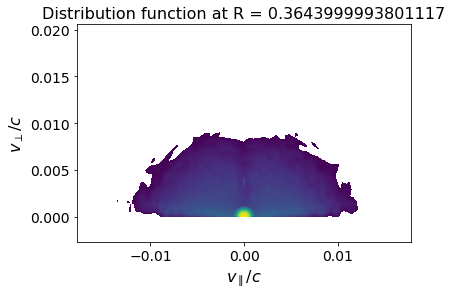

In [19]:
# Attempt to make the distrobution function plot with 
print(radbnd.shape)

i_R = 2
R = radbnd[i_R]

V, Theta = np.meshgrid(vbnd, ptchbnd)
f_at_rho = vdstb[i_R, :, :]

Vpara = V*np.cos(Theta)/c
Vperp = V*np.sin(Theta)/c
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('axes', labelsize = 16)
plt.rc('axes', titlesize = 16)
plt.rc('figure', titlesize = 18)
plt.rc('legend', fontsize = 14)
fig,ax = plt.subplots()
DDD=np.nan_to_num(np.log10(f_at_rho))
DDD=DDD.transpose()
DCmax=np.max(DDD)
Ncont= 300   # Number of contour levels
DCmin= DCmax-8 # limits for plots of log10(f)
levels=np.arange(DCmin,DCmax,(DCmax-DCmin)/(Ncont-1))
#pc = ax.pcolormesh(Vpara, Vperp, np.log10(f_at_rho.T+1), )
#ax.contour(Vpara, Vperp, DDD, levels=levels)
ax.contourf(Vpara, Vperp, DDD, levels=levels)
#ax.contourf(VPARA, VPERP, np.log(relevantF.T), cmap=cm.PuBu_r, levels = 100)
ax.set_aspect('equal')
ax.set_xlabel("$v_\parallel / c$")
ax.set_ylabel("$v_\perp / c$")
ax.set_ylim([0,.001]); ax.set_xlim([-.001,.001])
r_rounded = round(radbnd[i_R], 4)
print(r_rounded)
ax.set_title(f'Distribution function at R = {r_rounded}')
#fig.colorbar(pc)
plt.axis('equal')
plt.show()


